# PCA and Horn's Parallel Analysis Lab

In this lab you'll practice using PCA on two datasets: heptathalon performance and the wine dataset that you have seen previously.

Horn's Parallel Analysis is a way to determine how many components you should keep after using a PCA on your data. Essentially it will tell you which of your components are likely noise which can be discarded.

---

### Load packages and heptathalon data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
hep = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/heptathlon/heptathlon.csv')

In [3]:
hep.head()

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


---

### Create dataframe excluding athlete and score

In [4]:
stats = hep.iloc[:,1:-1]

In [5]:
stats.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
0,12.69,1.86,15.80,22.56,7.27,45.66,128.51
1,12.85,1.80,16.23,23.65,6.71,42.56,126.12
2,13.20,1.83,14.20,23.10,6.68,44.54,124.20
3,13.61,1.80,15.23,23.92,6.25,42.78,132.24
4,13.51,1.74,14.76,23.93,6.32,47.46,127.90


---

### Examine the correlation between the different events

Plot a heatmap if you want to get fancy. What does the correlation matrix tell you?

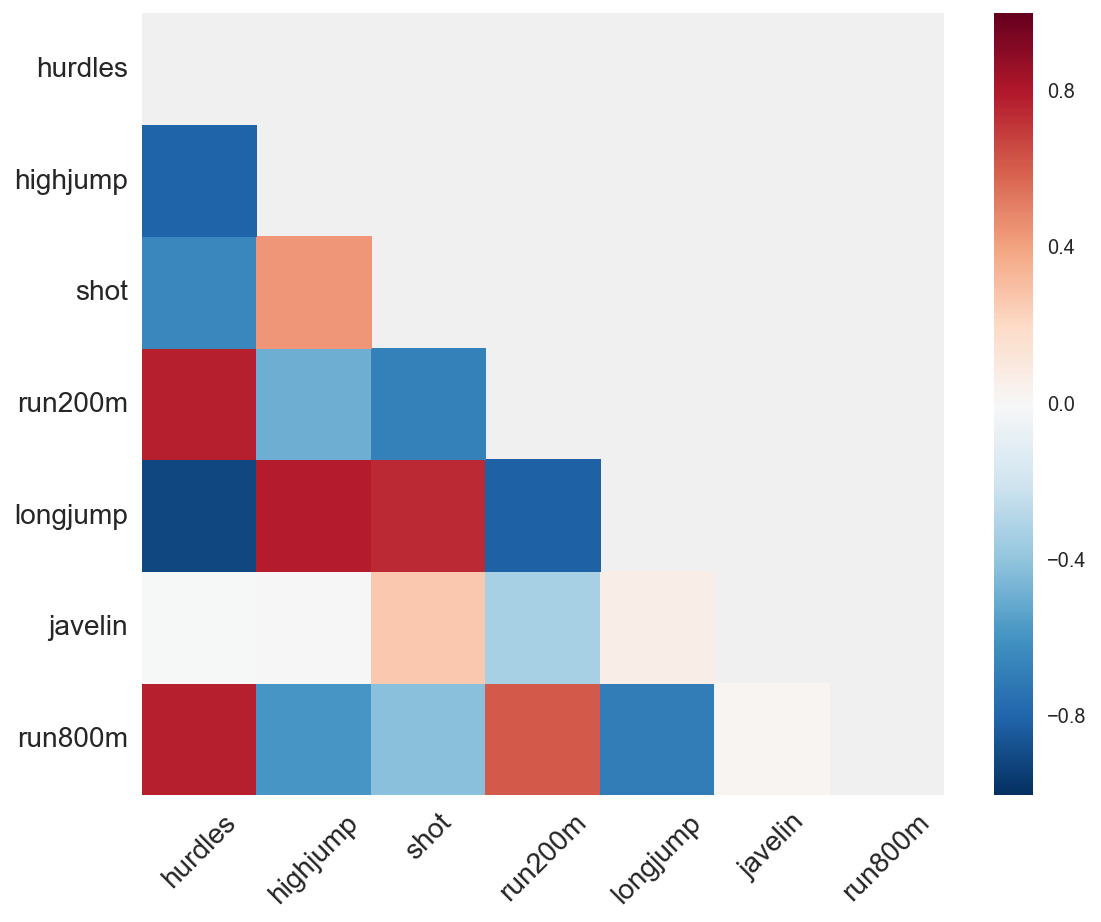

In [21]:
stats_corr = stats.corr()

mask = np.zeros_like(stats_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(stats_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

---

### Standardize the data

In [80]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
stats_n = ss.fit_transform(stats)

---

### Fit a PCA on the standardized data using sklearn

In [39]:
from sklearn.decomposition import PCA

hep_pca = PCA()
hep_pca.fit(stats_n)
stats_pcs = hep_pca.transform(stats_n)

---

### Create a DataFrame with the principal components

Add back in the athelete and score columns from the original data.

In [40]:
stats_pcs = pd.DataFrame(stats_pcs, columns=['PC'+str(i) for i in range(1,8)])
stats_pcs['athlete'] = hep.iloc[:,0]
stats_pcs['score'] = hep.score

In [41]:
hep_pca.components_

array([[ 0.45287105, -0.37719923, -0.3630725 ,  0.40789504, -0.45623185,
        -0.075409  ,  0.37495938],
       [-0.15792058,  0.24807386, -0.28940743,  0.26038545,  0.05587394,
        -0.84169212, -0.22448984],
       [-0.04514996,  0.36777902, -0.67618919,  0.08359211, -0.13931653,
         0.47156016, -0.39585671],
       [ 0.02653873, -0.67999172, -0.12431725, -0.3610658 , -0.11129249,
        -0.12079924, -0.6034113 ],
       [-0.09494792, -0.01879888, -0.51165201, -0.64983404,  0.1842981 ,
        -0.13510669,  0.50432116],
       [-0.78334101, -0.09939981,  0.05085983,  0.02495639, -0.59020972,
         0.02724076,  0.1555552 ],
       [-0.38024707, -0.43393114, -0.21762491,  0.45338483,  0.61206388,
         0.17294667,  0.09830963]])

---

### Plot the variance explained (ratio) of your components

Explain what this chart tells you about your components.

In [42]:
hep_pca.explained_variance_ratio_

array([ 0.63718217,  0.17061722,  0.07443059,  0.06530955,  0.03503811,
        0.01042223,  0.00700014])

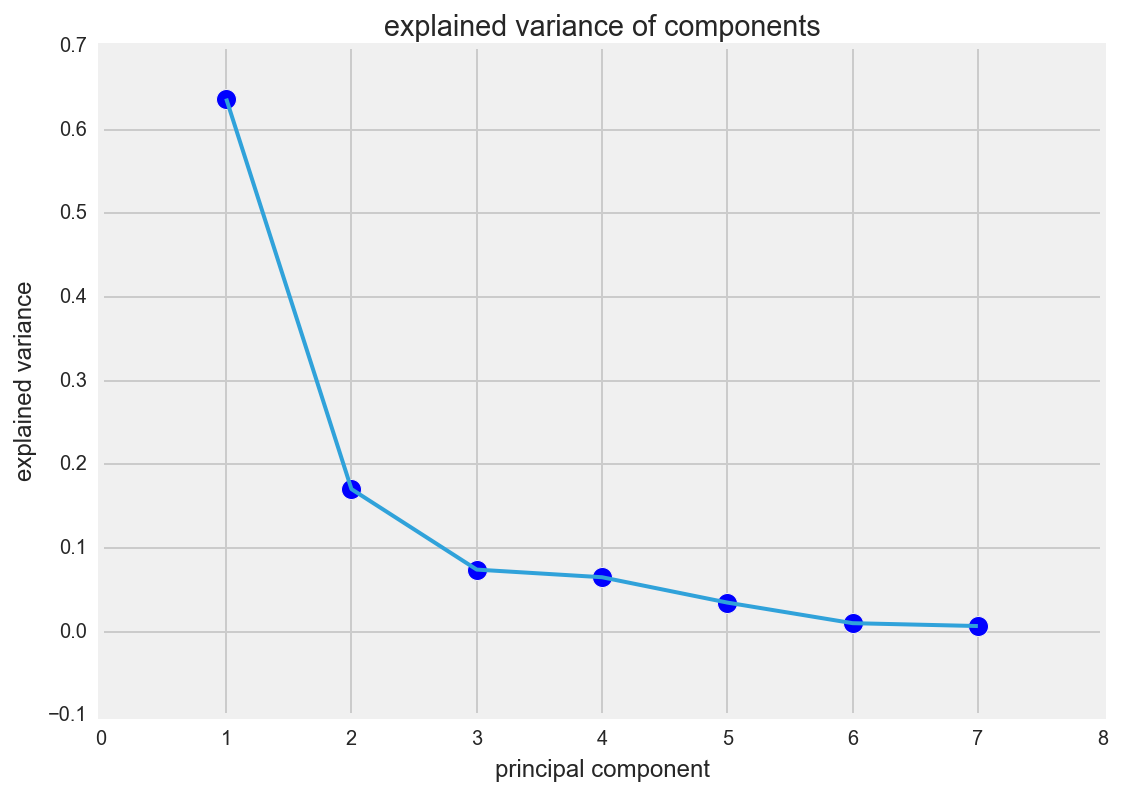

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, stats.shape[1]+1), hep_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, stats.shape[1]+1), hep_pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

---

### Print out the weights/eigenvectors (.components_ ) with their corresponding variables for PC1 and PC2

Based on how the original variables are weighted to calculate the components, how would you describe PC1 and PC2?

In [45]:
for col, comp in zip(stats.columns, hep_pca.components_[0]):
    print col, comp

hurdles 0.452871046493
highjump -0.377199230356
shot -0.363072497179
run200m 0.407895041255
longjump -0.456231849776
javelin -0.0754089953116
run800m 0.374959378673


In [46]:
for col, comp in zip(stats.columns, hep_pca.components_[1]):
    print col, comp

hurdles -0.15792058051
highjump 0.248073860443
shot -0.289407432672
run200m 0.260385452677
longjump 0.0558739391465
javelin -0.841692115096
run800m -0.22448984448


In [48]:
stats_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,athlete,score
0,-4.206435,-1.268024,-0.377541,-0.023476,0.434791,-0.346326,0.355096,Joyner-Kersee (USA),7291
1,-2.941619,-0.534526,-0.915920,0.485256,-0.717564,0.242997,0.146985,John (GDR),6897
2,-2.704271,-0.692759,0.468645,0.693643,0.107701,-0.244123,-0.132321,Behmer (GDR),6858
3,-1.371052,-0.706559,-0.607545,0.143571,-0.463288,0.093699,-0.496612,Sablovskaite (URS),6540
4,-1.387050,-1.789317,0.153809,0.853188,-0.701365,0.128908,0.244420,Choubenkova (URS),6540


In [49]:
stats_pcs.shape

(25, 9)

---

### Plot PC1 vs. PC2. Which athletes are notable on each component?

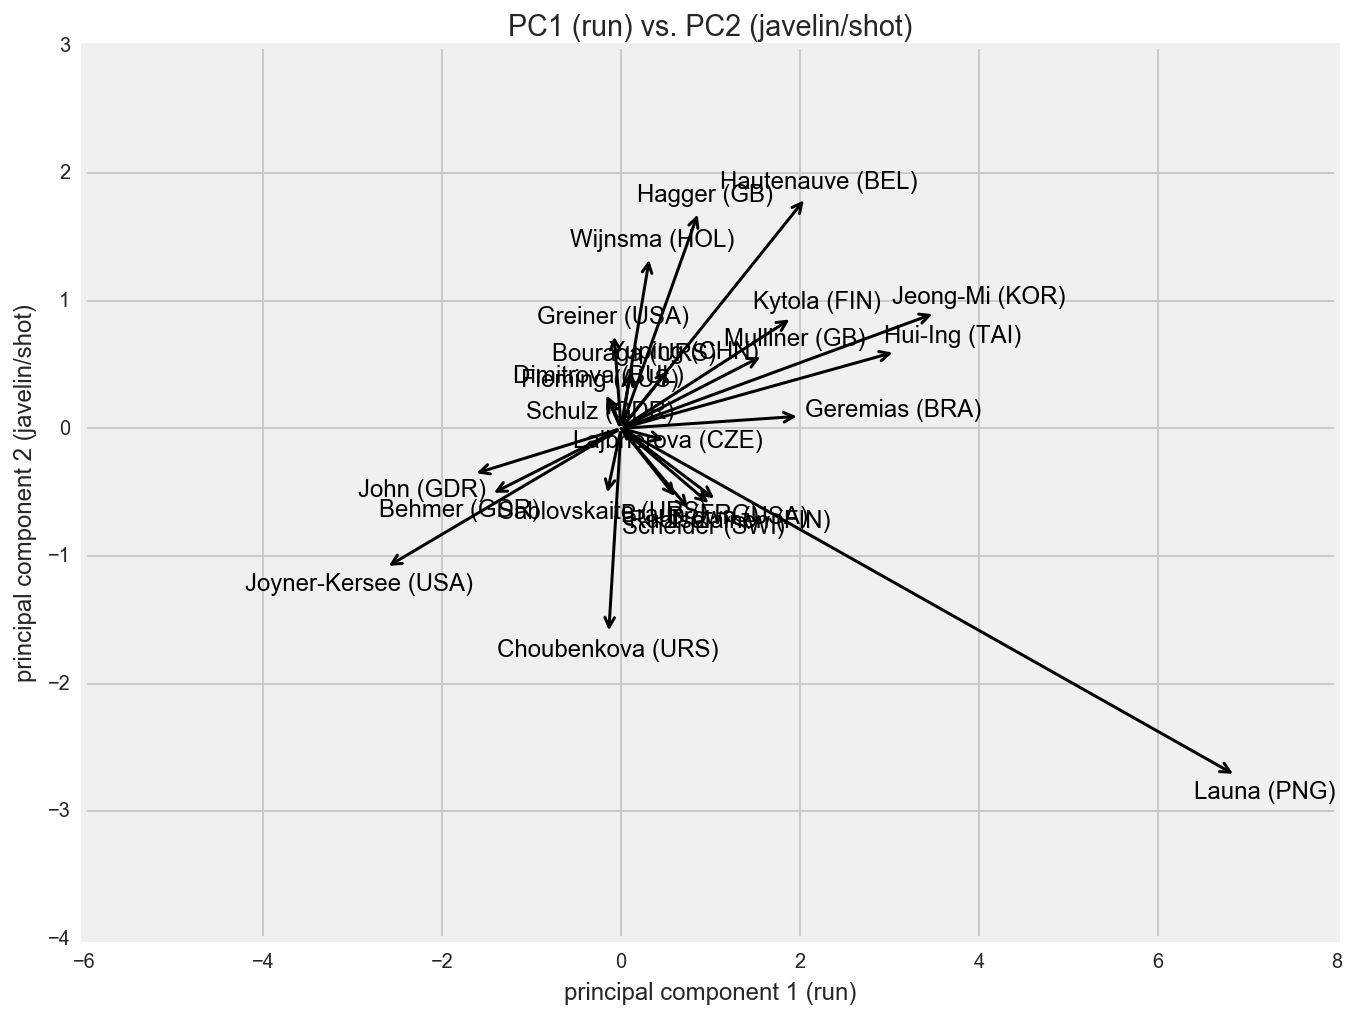

In [50]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(stats_pcs.PC1.values, stats_pcs.PC2.values, s=0)

for i, txt in enumerate(stats_pcs.athlete.values):
    ax.annotate(txt, (0, 0), (stats_pcs.PC1.values[i], stats_pcs.PC2.values[i]),
            arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.5),
            xycoords='data', textcoords='data', fontsize=12, color="black")

ax.set_title('PC1 (run) vs. PC2 (javelin/shot)')
ax.set_xlabel('principal component 1 (run)')
ax.set_ylabel('principal component 2 (javelin/shot)')
plt.show()


---

### Plot PC1 vs. score and PC2 vs. score. What does this tell you about the relationship between the events and the score?

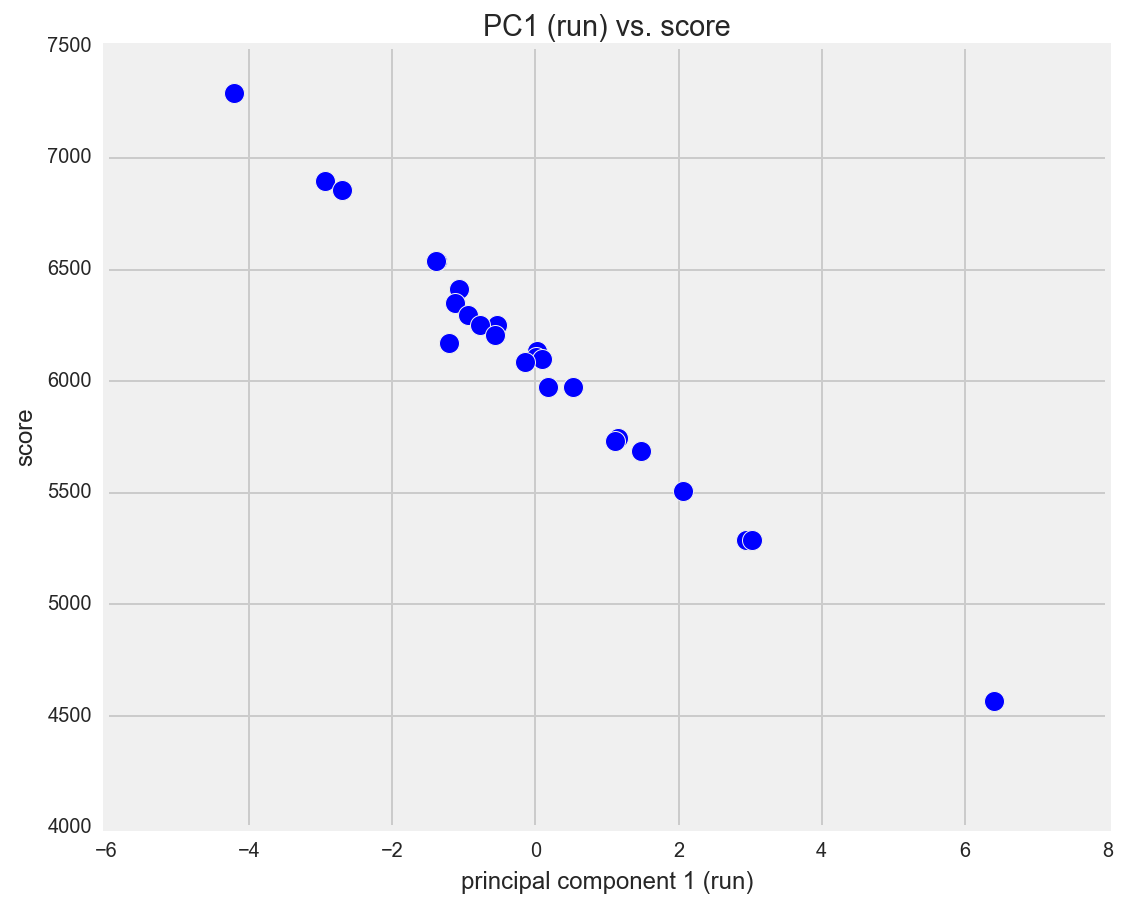

In [51]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(stats_pcs.PC1.values, stats_pcs.score.values, s=100)

ax.set_title('PC1 (run) vs. score')
ax.set_xlabel('principal component 1 (run)')
ax.set_ylabel('score')
plt.show()

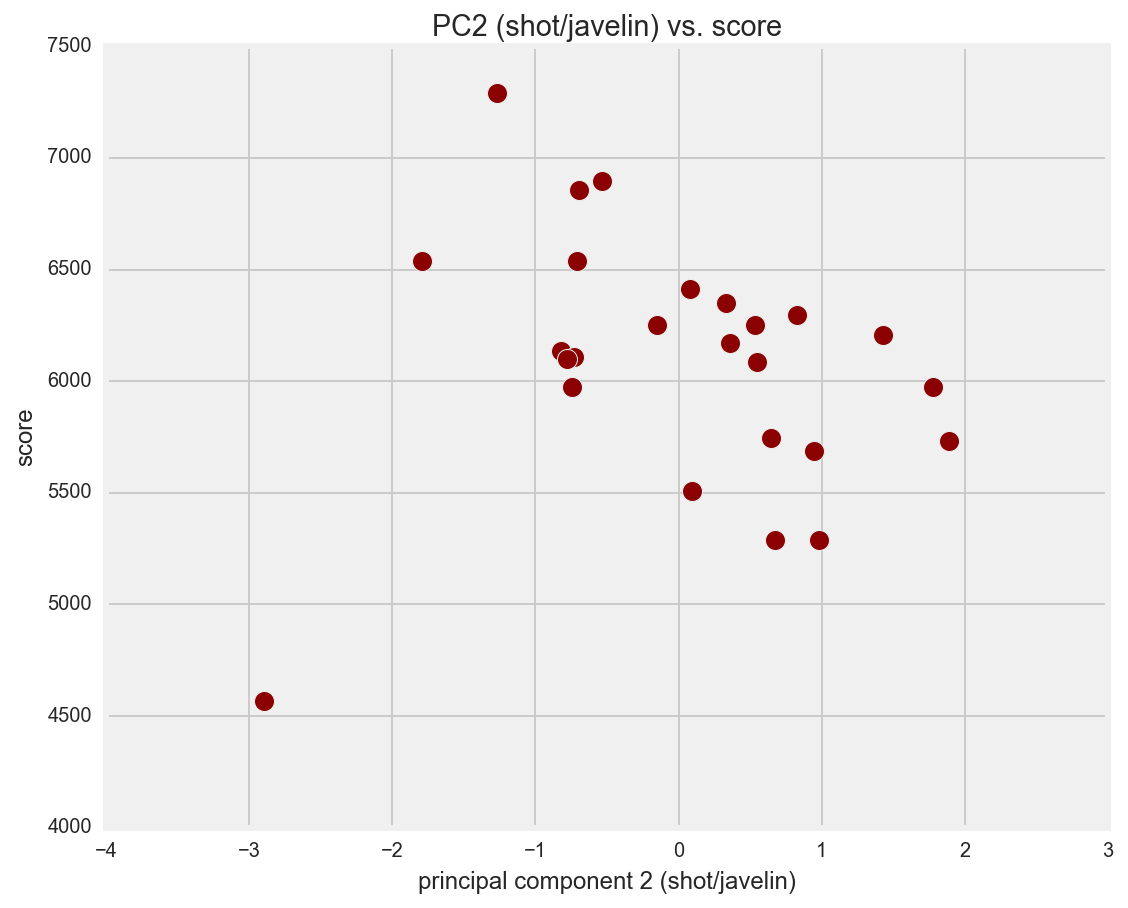

In [52]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(stats_pcs.PC2.values, stats_pcs.score.values, s=100, c='darkred')

ax.set_title('PC2 (shot/javelin) vs. score')
ax.set_xlabel('principal component 2 (shot/javelin)')
ax.set_ylabel('score')
plt.show()

---

### Load the wine data

In [53]:
wine = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/wine_quality/winequality_merged.csv')

In [54]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


---

### Subset the wine data to everything except the `red_wine` column

In [55]:
wine_cont = wine.iloc[:, 0:-1]

---

### Examine the correlation between variables

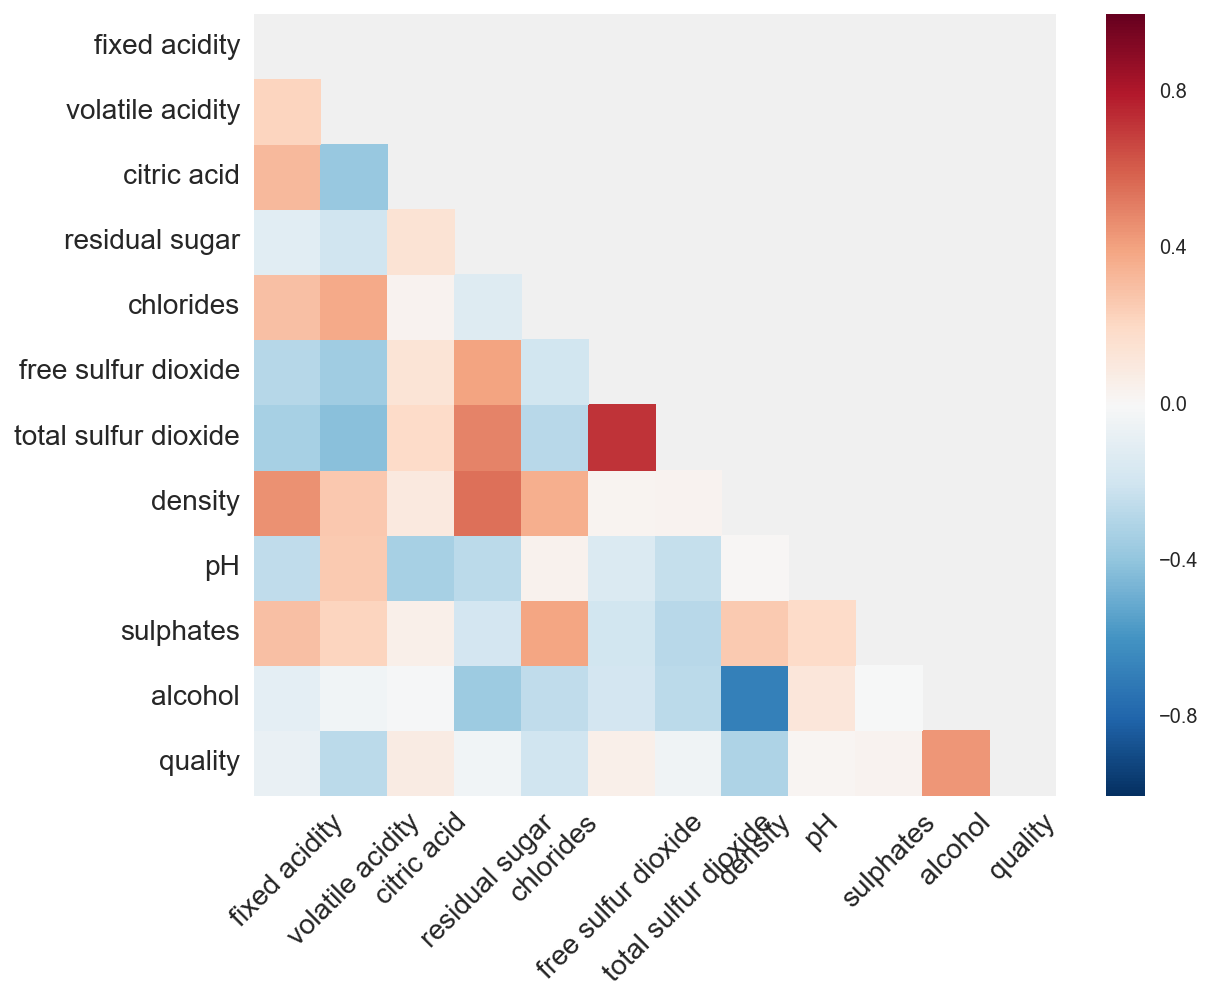

In [34]:
wine_corr = wine_cont.corr()

mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(wine_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

---

### Standardize the variables

In [57]:
ss = StandardScaler()
wine_cont_n = ss.fit_transform(wine_cont)

---

### Fit a PCA on the standardized data

Create a new dataframe with the principal components and the `red_wine` column added back in from the original data.

In [58]:
wine_pca = PCA().fit(wine_cont_n)
wine_pcs = wine_pca.transform(wine_cont_n)
wine_pcs = pd.DataFrame(wine_pcs, columns=['PC'+str(i) for i in range(1, wine_pcs.shape[1]+1)])
wine_pcs['red_wine'] = wine.red_wine

In [59]:
wine_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,red_wine
0,-3.348438,0.568926,2.727386,0.223777,-0.621408,0.231602,-0.124851,0.000515,0.646268,0.069141,0.104249,0.027643,1
1,-3.228595,1.197335,1.998904,0.377154,-0.110313,-1.945885,-0.938413,-0.425532,0.114802,0.449160,0.258251,-0.014469,1
2,-3.237468,0.952580,1.746578,0.472791,-0.225404,-1.082561,-0.451976,-0.411350,0.120635,0.272888,0.081613,0.053961,1
3,-1.672561,1.600583,-2.856552,0.438364,-0.213093,0.970765,-0.222429,0.279690,1.294900,-0.212574,-0.120527,-0.100574,1
4,-3.348438,0.568926,2.727386,0.223777,-0.621408,0.231602,-0.124851,0.000515,0.646268,0.069141,0.104249,0.027643,1


---

### Plot the variance explained ratio of the components

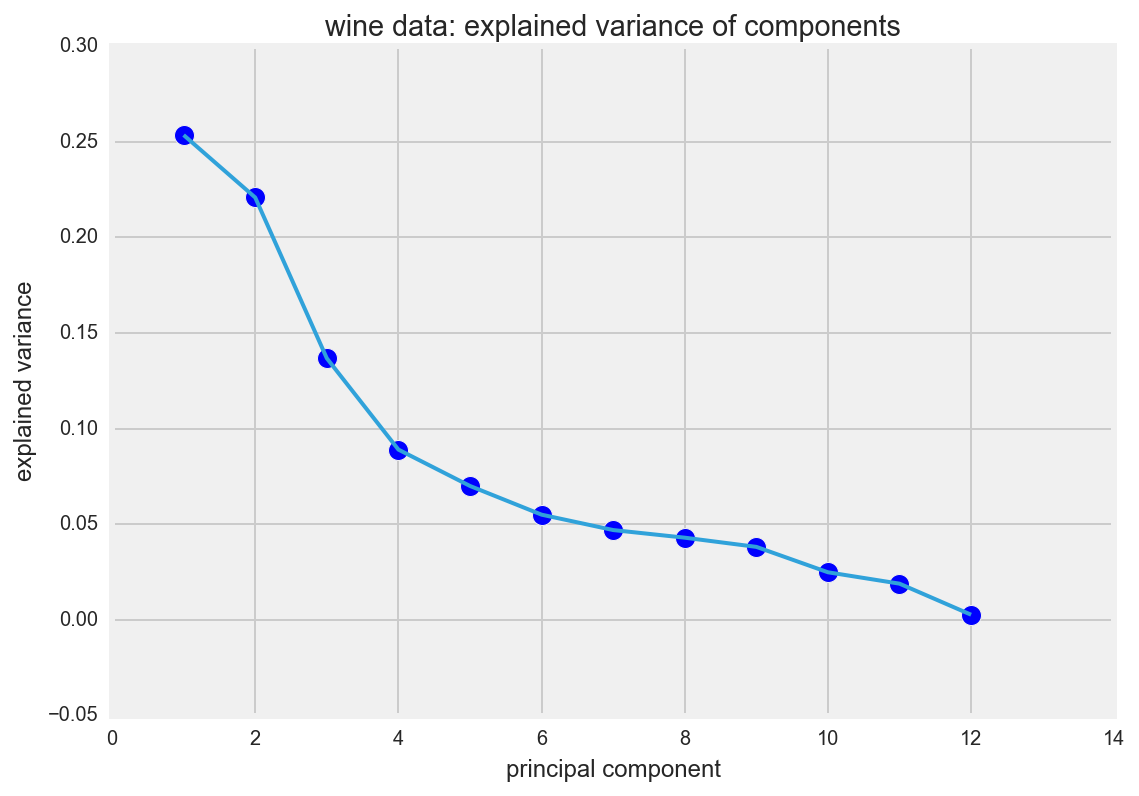

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_ratio_, s=100)
ax.set_title('wine data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

---

### Print out the component weights with their corresponding variables for PC1, PC2, and PC3

How would you label the components based on the weights?

In [61]:
for col, comp in zip(wine_cont.columns, wine_pca.components_[0]):
    print col, comp

fixed acidity -0.256928733111
volatile acidity -0.39493117944
citric acid 0.146460610663
residual sugar 0.318905191475
chlorides -0.313449939668
free sulfur dioxide 0.422691371567
total sulfur dioxide 0.474419684357
density -0.0924375324327
pH -0.20806956646
sulphates -0.29985191609
alcohol -0.0589240827477
quality 0.0874757097877


In [62]:
for col, comp in zip(wine_cont.columns, wine_pca.components_[1]):
    print col, comp

fixed acidity 0.261843062046
volatile acidity 0.105198251341
citric acid 0.144093484947
residual sugar 0.342584967641
chlorides 0.269770095513
free sulfur dioxide 0.111178780564
total sulfur dioxide 0.143947528574
density 0.554920473971
pH -0.152921853598
sulphates 0.1196342033
alcohol -0.49272747405
quality -0.29660090632


In [63]:
for col, comp in zip(wine_cont.columns, wine_pca.components_[3]):
    print col, comp

fixed acidity 0.143963771283
volatile acidity 0.0800578538331
citric acid -0.0555103604809
residual sugar -0.112456230601
chlorides -0.165290038786
free sulfur dioxide -0.303306311912
total sulfur dioxide -0.132231986011
density -0.150578531289
pH -0.471477676493
sulphates -0.588019919588
alcohol -0.0800317855629
quality -0.47243935985


---

### Plot a seaborn pairplot of PC1, PC2, and PC3 with `hue='red_wine'`

Do any of the components differentiate red and white wine? If so, what does this tell you about the difference between red and white wine based on the component weights?

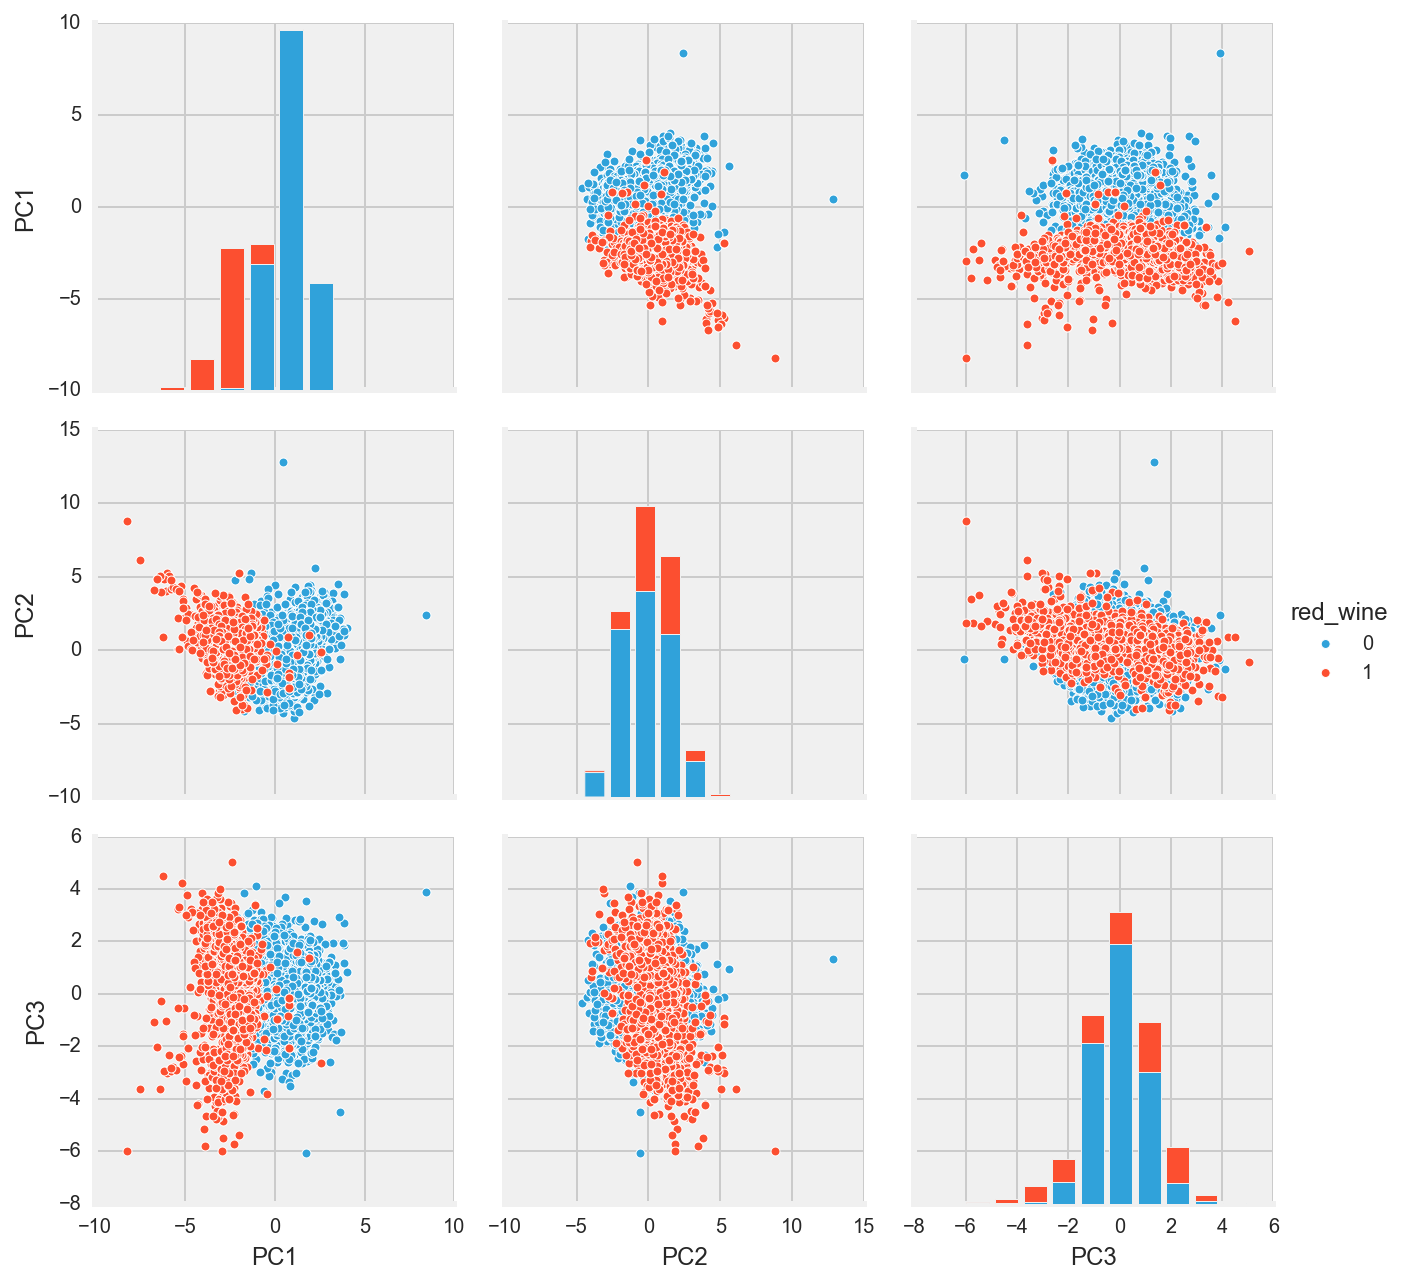

In [67]:
sns.pairplot(data=wine_pcs, vars=['PC1','PC2','PC3'], hue='red_wine', size=3)

In [68]:
wine_cont.shape

(6497, 12)

---

### Horn's parallel analysis

You can determine the appropriate number of components to keep by using a bootstrapping procedure known as Horn's Parallel Analysis. This is (as far as I know) the gold standard in determining which components aren't noise.

How to do the parallel analysis (pseudocode):

    for n iterations:
        create normally distributed random data the same shape as your data
        fit a PCA on the random data
        pull out the eigenvalues
    select a percentile of the eigenvalues as your threshold (0.5 = median, 0.95 = 95% confidence, etc.)
    plot the random component eigenvalues at that percentile against your data's pca eigenvalues
    components above the selected percentile are not noise, those under are
    
    
Write a function to perform the parallel analysis.

In [81]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

---

### Run parallel analysis for the wine data

In [82]:
wine_pa = horn_parallel_analysis(wine_cont.shape, percentile=95)

---

### Plot the wine eigenvalues (`.variance_explained_`) against the parallel analysis random eigenvalue cutoffs

How many components are not noise, based on the chart?

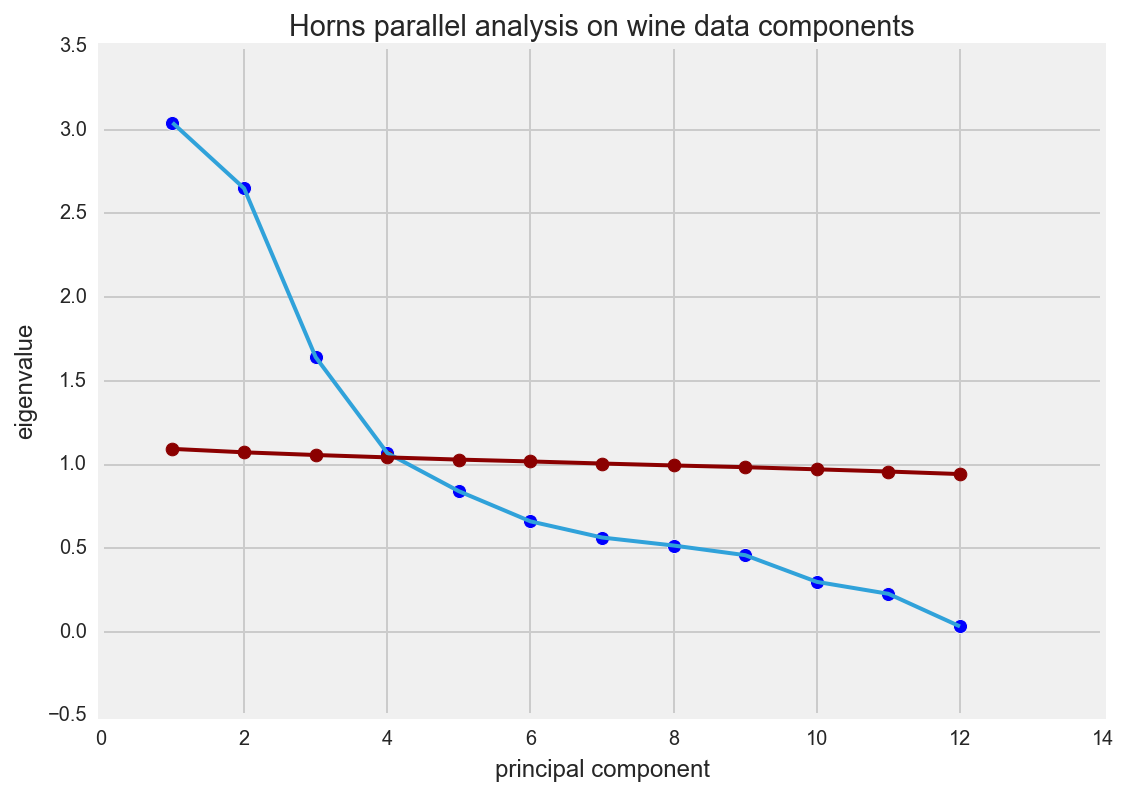

In [83]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_, lw=2)
ax.scatter(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_, s=50)

ax.plot(range(1, len(wine_pa)+1), wine_pa, lw=2, color='darkred')
ax.scatter(range(1, len(wine_pa)+1), wine_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on wine data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()